5 Baris Pertama Data:
         Order ID     Month  Year           City    Segment         Category  \
0  CA-2014-156587     Maret  2014    DKI Jakarta   Consumer        Furniture   
1  CA-2014-156587     Maret  2014     Jawa Barat   Consumer  Office Supplies   
2  CA-2014-152905  Februari  2014         Banten   Consumer  Office Supplies   
3  CA-2014-156587     Maret  2014    Jawa Tengah   Consumer  Office Supplies   
4  CA-2014-157644  Desember  2014  DI Yogyakarta  Corporate       Technology   

  Sub-Category                                       Product Name       Sales  \
0       Chairs         Global Push Button Manager's Chair, Indigo   USD 48,71   
1      Storage            Carina 42"Hx23 3/4"W Media Storage Unit  USD 242,94   
2      Storage                                 Akro Stacking Bins   USD 12,62   
3          Art                                         Newell 330   USD 17,94   
4  Accessories  Verbatim 25 GB 6x Blu-ray Single Layer Recorda...   USD 34,77   

   Quantit

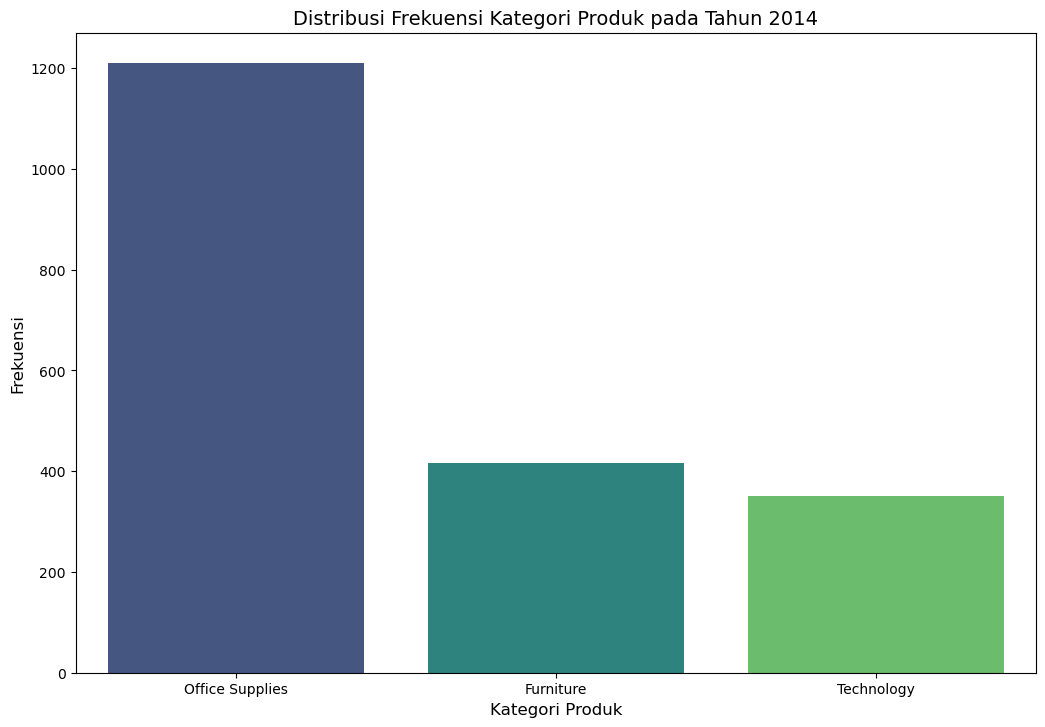

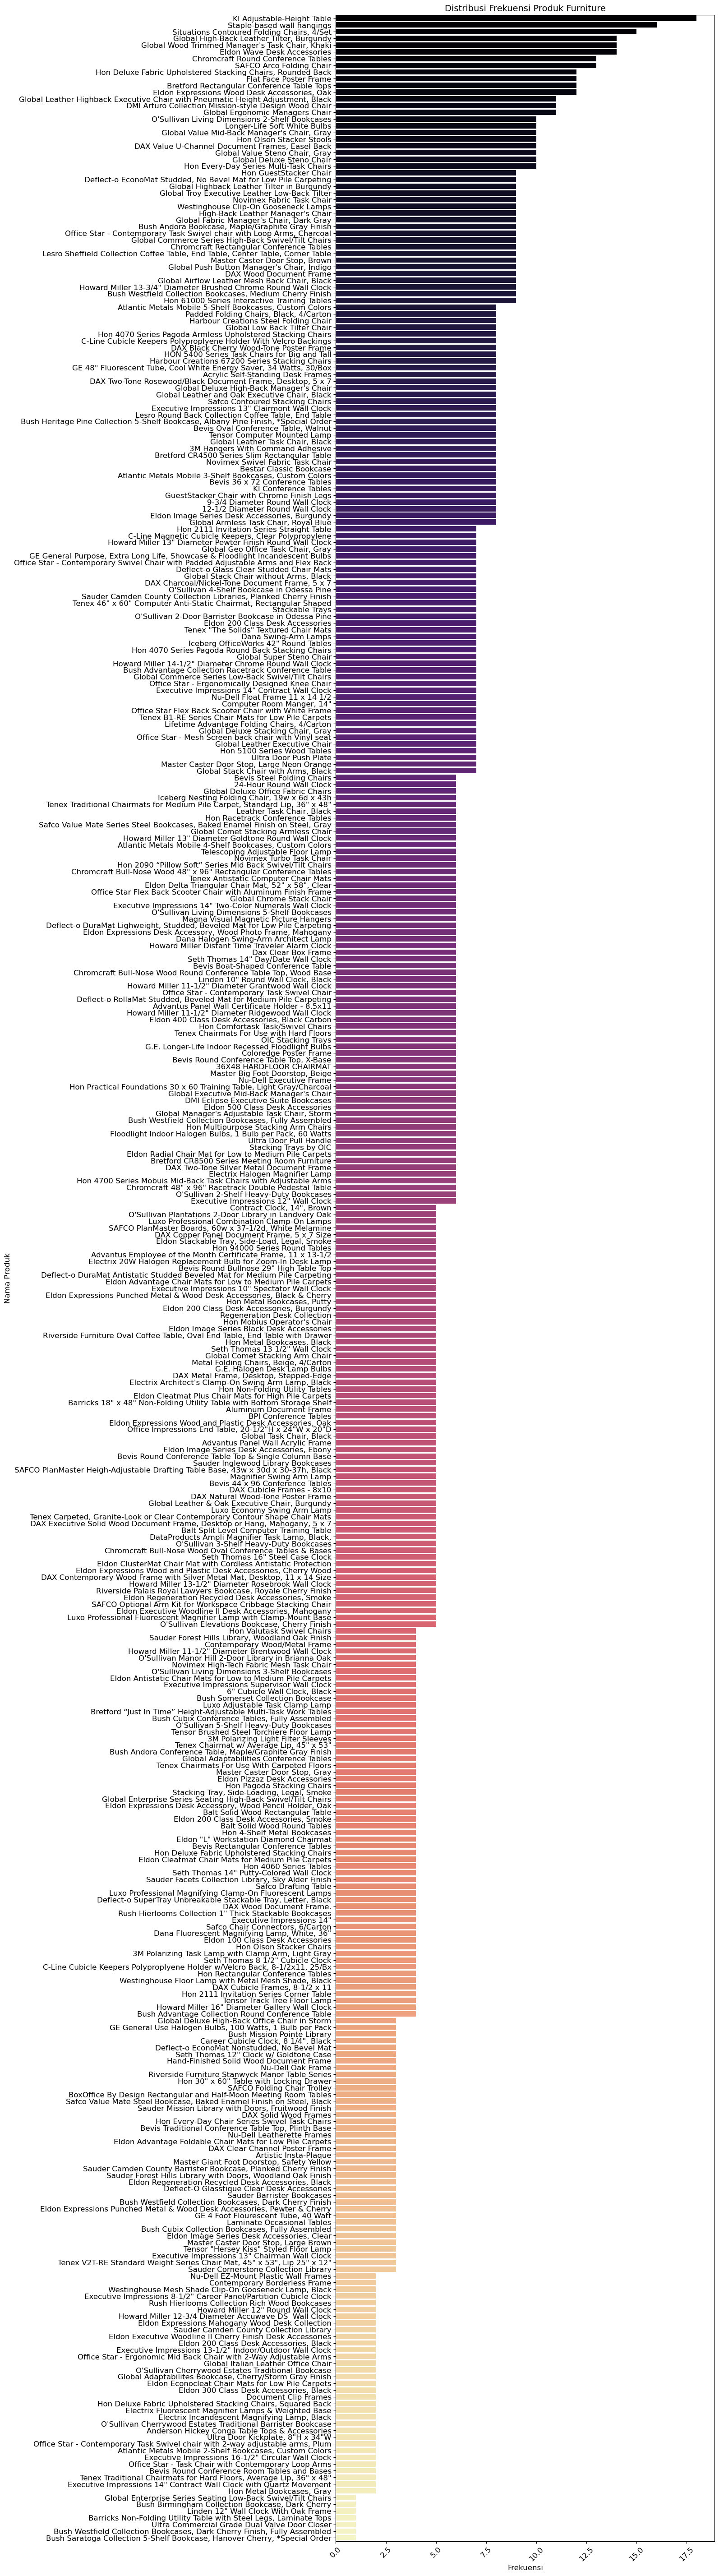

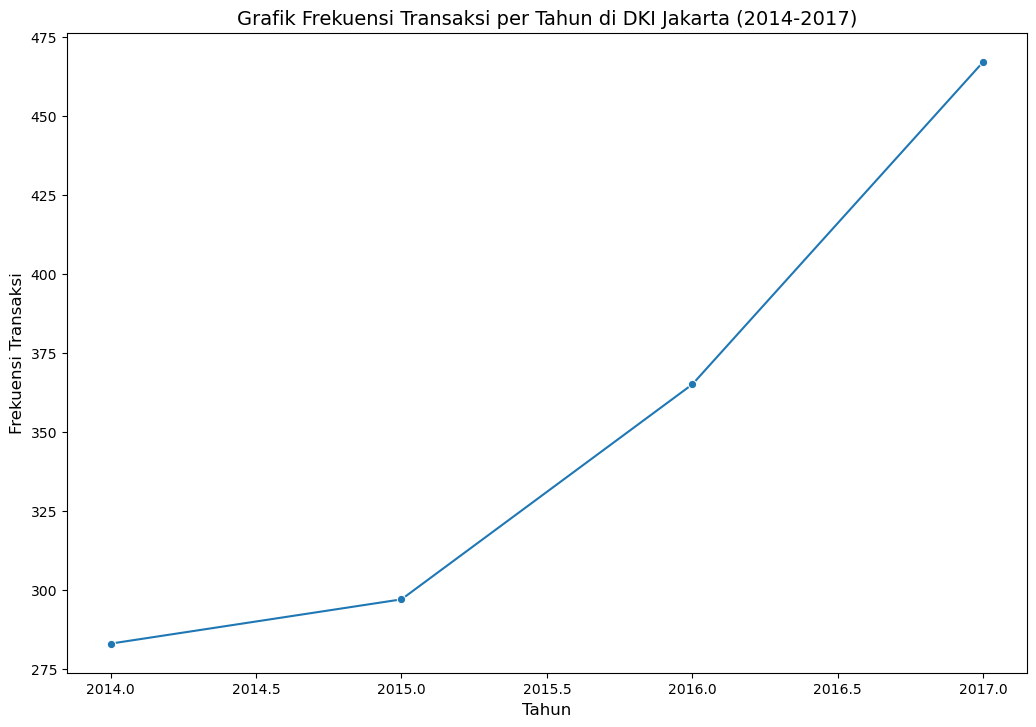

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#sesuaikan dgn tempat penyimpanan
file_path = "C:/Users/USER/Downloads/Data Sales.csv"

#jika encoding windows-1252 tidak bisa,
df = pd.read_csv(file_path, encoding='windows-1252', delimiter = ';')

print("5 Baris Pertama Data:")
print(df.head())
print("\n")

# 1. Distribusi Frekuensi Kategori Produk pada Tahun 2014 dan Visualisasikan
# ------------------------------------------------------------------------------------
df_2014 = df[df['Year'] == 2014]
category_distribution = df_2014['Category'].value_counts()
print("1. Distribusi Frekuensi Kategori Produk pada Tahun 2014:")
print(category_distribution.to_string())
print("\n")

# 2. Distribusi Frekuensi Produk dengan Kategori Furniture
# ------------------------------------------------------------------------------------
df_furniture = df[df['Category'] == 'Furniture']
product_distribution = df_furniture['Product Name'].value_counts()
print("2. Distribusi Frekuensi Produk dengan Kategori Furniture:")
print(product_distribution.to_string())
print("\n")

# 3. Produk dengan Penjualan Terbanyak pada Kategori Technology
# ------------------------------------------------------------------------------------
df_technology = df[df['Category'] == 'Technology']
top_selling_product = df_technology['Product Name'].value_counts().idxmax()

print("3. Produk dengan frekuensi terbanyak pada kategori Technology:")
print(top_selling_product)
print("\n")

# 4. Grafik Penjualan per Tahun di Kota DKI Jakarta (Tahun 2014 - 2017)
# ------------------------------------------------------------------------------------
df_jakarta = df[df['City'] == 'DKI Jakarta']
transactions_per_year = df_jakarta.groupby('Year').size()
print("4. Distribusi Frekuensi Transaksi per Tahun di Kota DKI Jakarta (2014-2017):")
print(transactions_per_year.to_string())
print("\n")

# 5. Peluang Pembeli Tipe Corporate Membeli Barang Kategori Office Supplies pada Tahun 2015
# ------------------------------------------------------------------------------------
df_2015_corporate = df[(df['Year'] == 2015) & (df['Segment'] == 'Corporate')]
total_corporate_transactions = df_2015_corporate.shape[0]
office_supplies_transactions = df_2015_corporate[df_2015_corporate['Category'] == 'Office Supplies'].shape[0]

probability = office_supplies_transactions / total_corporate_transactions
print("5. Peluang Pembeli Tipe Corporate Membeli Barang Kategori Office Supplies pada Tahun 2015:")
print(f"{probability:.2%}")
print("\n")

# 1. Visualisasi Distribusi Frekuensi Kategori Produk pada Tahun 2014
# ------------------------------------------------------------------------------------
print("Tabel Distribusi Frekuensi Kategori Produk pada Tahun 2014")
plt.figure(figsize=(12, 8))  # Perbesar ukuran gambar
sns.barplot(x=category_distribution.index, y=category_distribution.values, hue=category_distribution.index, palette='viridis', legend=False)
plt.title('Distribusi Frekuensi Kategori Produk pada Tahun 2014', fontsize=14)
plt.xlabel('Kategori Produk', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)  # Atur margin manual
plt.show()

# ------------------------------------------------------------------------------------
# 2. Visualisasi Distribusi Frekuensi Produk dengan Kategori Furniture
# ------------------------------------------------------------------------------------
plt.figure(figsize=(12, 80))  # Perbesar ukuran gambar
# sns.barplot(x=top_10_products.values, y=top_10_products.index, hue=top_10_products.index, palette='magma', legend=False)
sns.barplot(x=product_distribution.values, y=product_distribution.index, hue=product_distribution.index, palette='magma', legend=False)  # Buat bar chart horizontal
plt.title('Distribusi Frekuensi Produk Furniture', fontsize=14)  # Judul grafik
plt.xlabel('Frekuensi', fontsize=12)  # Label sumbu X
plt.ylabel('Nama Produk', fontsize=12)  # Label sumbu Y
plt.xticks(rotation=45)  # Rotasi label sumbu X jika diperlukan
plt.tight_layout()  # Atur layout agar tidak terpotong
plt.xticks(fontsize=12)  # Atur ukuran font label sumbu X
plt.yticks(fontsize=12)  # Atur ukuran font label sumbu Y
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.2)  # Atur margin manual
plt.show()

# ------------------------------------------------------------------------------------
# 4. Visualisasi Grafik Penjualan per Tahun di Kota DKI Jakarta (Tahun 2014 - 2017)
# ------------------------------------------------------------------------------------
plt.figure(figsize=(12, 8))  # Perbesar ukuran gambar
sns.lineplot(x=transactions_per_year.index, y=transactions_per_year.values, marker='o')
plt.title('Grafik Frekuensi Transaksi per Tahun di DKI Jakarta (2014-2017)', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Frekuensi Transaksi', fontsize=12)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)  # Atur margin manual
plt.show()